In [35]:
import pandas
import matplotlib.pyplot as plt
import sklearn
import random
import collections

In [36]:
# path = '../data/flats_29August2021.csv'
path = '../data/flats_03October.csv'

df = pandas.read_csv(path, sep=';')
print(df.head())

columns = ['price_id', 'flat_id', 'price', 'date', 'ad_id', \
    'title', 'date_posted', 'date_scraped', 'location', 'seller', \
    'property_type', 'num_rooms', 'num_bathrooms', 'flat_area',  \
    'text', 'description', 'photos_links', 'page_address']

num_columns = ['price', 'date', \
    'title', 'date_posted', 'date_scraped', 'location', 'seller', \
    'property_type', 'num_rooms', 'num_bathrooms', 'flat_area',  \
    'text', 'description']


   price_id    flat_id    price        date      ad_id  \
0         1  247741867  2290000  2021-01-22  247741867   
1         2  335769299   690000  2021-01-22  335769299   
2         3  426220306   860000  2021-01-26  426220306   
3         4  441050757  2157000  2021-01-20  441050757   
4         5  468323060   390000  2021-01-18  468323060   

                                               title date_posted date_scraped  \
0            Stara Saska Kępa, wyjątkowy apartament   2018-07-01   2021-01-22   
1                       Tarchomin - 104m2 - 5 pokoi   2018-10-26   2021-01-22   
2  Na sprzedaż, 3 pokoje na Woli przy rondzie ONZ...  2019-02-12   2021-01-26   
3                     Apartament w Centrum Warszawy   2019-03-01   2021-01-20   
4     Nowa kawalerka do wprowadzenia w chmurach 15p   2019-04-04   2021-01-18   

                   location      seller property_type  num_rooms  \
0  Praga Południe, Warszawa     Agencja    Mieszkanie          6   
1       Białołęka, Warszawa 

In [37]:
df = df[num_columns]

df = df.loc[df['flat_area'] < 300]
df = df.loc[df['price'] < 4500000]

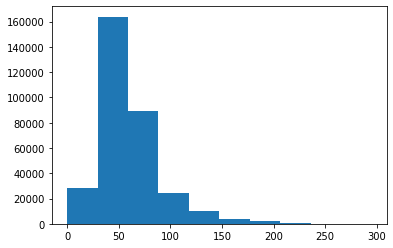

In [38]:
plt.hist(df['flat_area'])
plt.show()

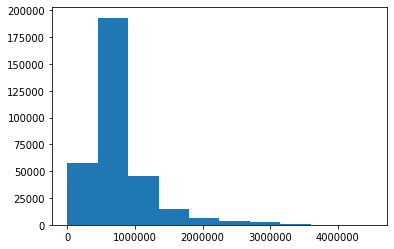

In [39]:
plt.hist(df['price'])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [40]:
## How other variables relate with our target variable

corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
flat_area        0.824480
num_rooms        0.579191
num_bathrooms    0.337966
Name: price, dtype: float64

# Patodeweloperka EDA

In [41]:
df_small = df.loc[df['flat_area'] < 27]
len(df_small)

18172

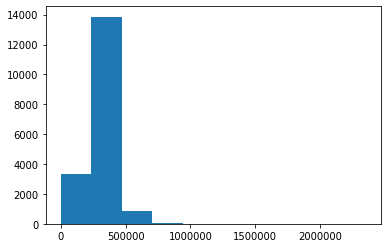

In [42]:
plt.hist(df_small['price'])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [43]:
from collections import Counter
from spacy.lang.pl.stop_words import STOP_WORDS

In [44]:
small_descriptions = []
for desc in df_small['description']:
    desc = [x.lower() for x  in desc.split()]
    small_descriptions +=  desc

to_replace = r'0123456789.,/\:;-=!@#$%^&*()'

desc_clean = []

for token in small_descriptions:
    for repl in list(to_replace):
        token = token.replace(repl, ' ').strip()

    if token not in STOP_WORDS:
        desc_clean.append(token)

c = Counter(desc_clean)
print(c.most_common)

<bound method Counter.most_common of Counter({'': 189891, 'oferty': 23712, 'm': 22921, 'mieszkanie': 22527, 'lokalizacja': 17526, 'warszawa': 17524, 'nieruchomości': 16716, 'biurze': 16306, 'dodane': 16149, 'pomocą': 16145, 'trimo pro': 16128, 'mazowieckie': 16104, 'budynku': 15697, 'centrum': 12352, 'numer': 12194, 'zapraszam': 12176, 'informacje': 9655, 'ofertę': 8999, 'oferta': 8963, 'mieszkania': 8087, 'pobliżu': 7688, 'znajduje': 7612, 'blisko': 7373, 'ul': 7247, 'zł': 6569, 'rozumieniu': 6504, 'stanowi': 6493, 'warszawy': 6307, 'kodeksu': 6206, 'powierzchni': 5940, 'szczegółowe': 5772, 'sklepy': 5573, 'cywilnego': 5539, 'recepcja': 5515, 'kawalerka': 5336, 'standard': 5157, 'prezentację': 4914, 'przystanki': 4897, 'nieruchomość': 4827, 'piętrze': 4748, 'apartamentów': 4664, 'min': 4652, 'apartament': 4609, 'możliwość': 4571, 'komunikacja': 4481, 'kontakt': 4462, 'mieszkań': 4369, 'wolaogłoszenie': 4340, 'lokalizacji': 4291, 'lokal': 4273, 'metro': 4244, 'łazienka': 4217, 'budynek

# NLP

In [45]:
import spacy
import pl_core_news_lg

nlp = pl_core_news_lg.load()



In [46]:
from sklearn.model_selection import train_test_split


train_set, test_set= train_test_split(df, test_size=0.2, random_state=42)
# Decision Tree baseline
# KNN Regression
# Random Forest Regression